## Build an ensemble using algorithms and distances, finish to see if it uncovers the lack of structure

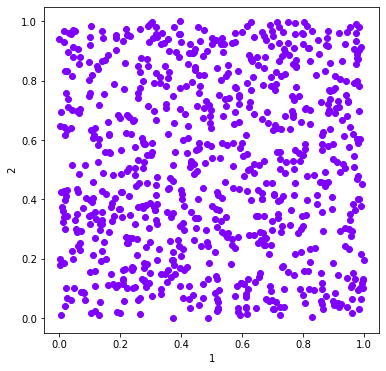

In [1]:
import numpy as np
import pandas as pd 
import openensembles as oe
import matplotlib.pyplot as plt


n_samples = 800
np.random.seed(0) #this helps to establish the same dataset and functionality, but is not required

no_structure = np.random.rand(n_samples, 2), None
X,y = no_structure
df = pd.DataFrame(X)
d = oe.data(df, [1,2])


data_plot = d.plot_data('parent')
   

### Create an ensemble


In [2]:
c  = oe.cluster(d) #instantiate an object so we can get all available algorithms
a = c.algorithms_available()
paramsC = c.clustering_algorithm_parameters() #here we will rely on walking through 
    
# remove DBSCAN -- this does very well on unstructured data, we want to ask if we can use poorly performing algorithms 
# to identify if there isn't structure.
algorithmsToRemove = ['DBSCAN']
for algToRemove in algorithmsToRemove:
    del a[algToRemove]

takesLinkages = paramsC['linkage']
takesDistances = paramsC['distance']
takesK = paramsC['K']



In [3]:
#setup the parameters of clustering here, algorithms are set by algorithms_available
K = range(3, 20, 2)
linkages = ['average', 'complete', 'ward'] 
distances = ['euclidean', 'l1', 'l2']


In [5]:
# Create an ensemble: sweep K, distance metrics
c = oe.cluster(d)
for data_source in d.D.keys(): #if there were transformations in d.D
    for algorithm in list(a.keys()): #linkage is only for agglomerative, which also accepts K and distances, so handle that here
        if algorithm in takesK:
            for k in K:
                if algorithm in takesDistances:
                    if algorithm in takesLinkages:
                        for linkage in linkages:
                            if linkage == 'ward':
                                out_name = '_'.join([data_source, algorithm, linkage, str(k)])
                                c.cluster(data_source, algorithm, out_name, K=k, Require_Unique= True, linkage=linkage)
                            else:
                                for dist in distances:
                                    out_name = '_'.join([data_source, algorithm, dist, linkage, str(k)])
                                    c.cluster(data_source, algorithm, out_name, K=k, Require_Unique= True, linkage=linkage, distance=dist)



                    else:
                        for dist in distances:
                            out_name = '_'.join([data_source, algorithm, dist, str(k)])
                            c.cluster(data_source, algorithm, out_name, K=k, Require_Unique= True, distance=dist)
                else:
                    out_name = '_'.join([data_source, algorithm, str(k)])
                    c.cluster(data_source, algorithm, out_name, K=k, Require_Unique= True)


        else: # does not take K
            if algorithm in takesDistances:
                    for dist in distances:
                        out_name = '_'.join([data_source, algorithm, dist])
                        c.cluster(data_source, algorithm, out_name, Require_Unique= True, distance=dist)
            else:
                out_name = '_'.join([data_source, algorithm])
                c.cluster(data_source, algorithm, out_name, Require_Unique= True)

        

### Plot example solutions from the ensemble 

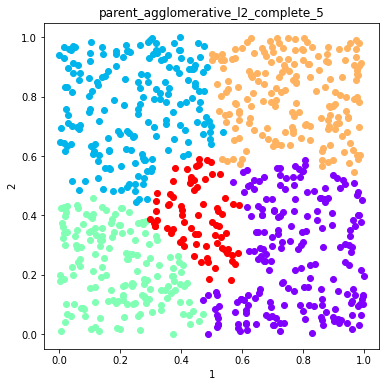

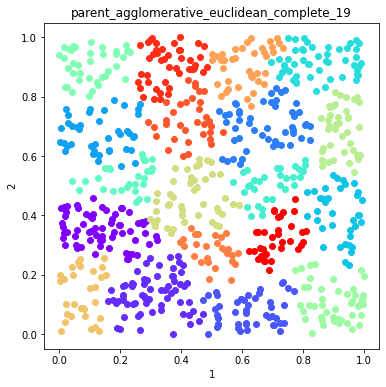

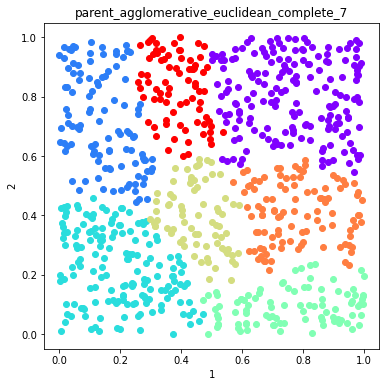

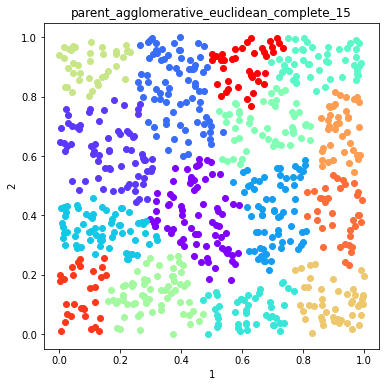

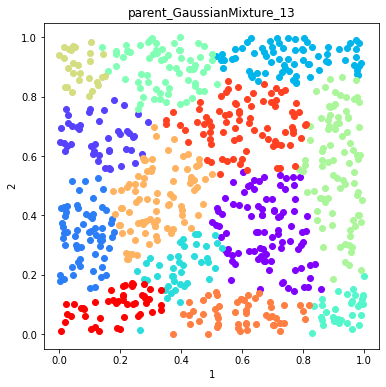

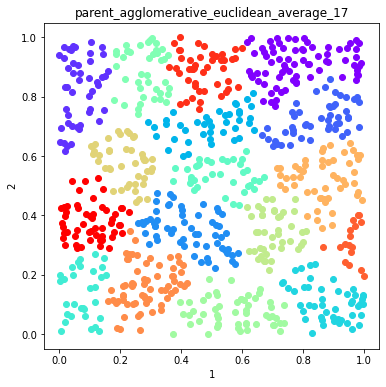

In [6]:
#plot some random number of solutions
names = c.labels.keys()
figs =[]
fig = 0

numSolutions = 6
#namesToSelect = random.sample(names, numSolutions)
namesToSelect = np.random.choice(list(names), numSolutions, replace=False)
for name in namesToSelect:
    plt = d.plot_data('parent', fig_num=fig, class_labels=c.labels[name], title=name)
    fig+=1
        

### Finish the ensemble using Majority Vote and Graph Closure 

In [7]:
#View the ensembles
coMat = c.co_occurrence_matrix()


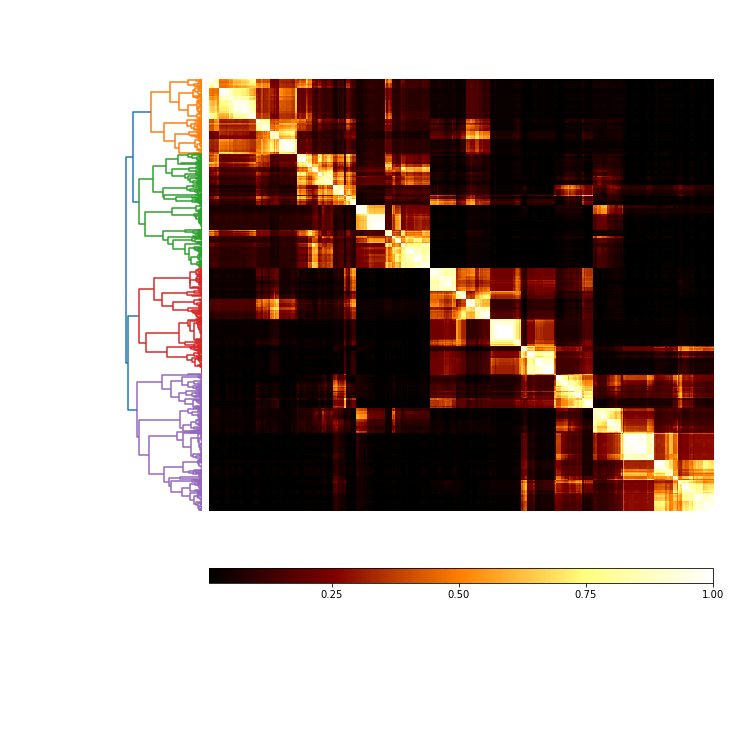

In [8]:
fig = coMat.plot(add_labels=False)


#### Graph Closure and Majority Vote Finishing

In [ ]:
# Explore effects of threshold on graph closure
thresholds = [0.5, 0.6, 0.7]
fig = 0
c_graph_dict = {}
c_majority_vote_dict = {}
for threshold in thresholds:
    c_graph = c.finish_graph_closure(threshold=threshold)
    c_graph_dict[str(threshold)] = c_graph
    c_majority_vote = c.finish_majority_vote(threshold=threshold)
    c_majority_vote_dict[str(threshold)] = c_majority_vote

In [ ]:
# Plot the solutions of Graph Closure
fig = 0
for threshold in c_graph_dict:
    labels = c_graph_dict[threshold].labels['graph_closure']
    d.plot_data('parent', fig_num = fig, class_labels=labels, title='Graph Closure threshold=%s'%(threshold))
    fig+=1


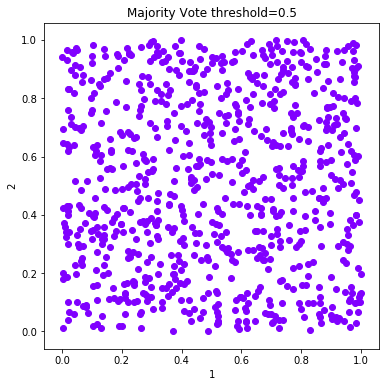

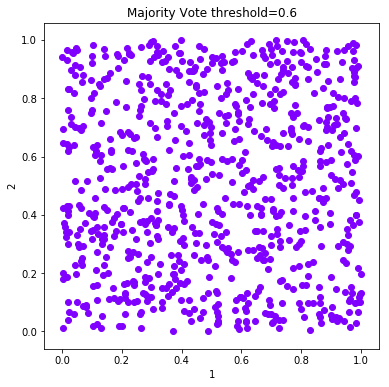

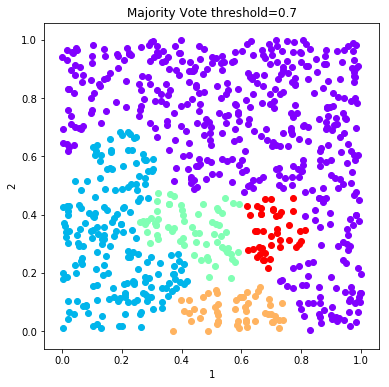

In [10]:
# Plot the solutions of Majority Vote
fig = 0
figs =[]
for threshold in c_majority_vote_dict:
    labels = c_majority_vote_dict[threshold].labels['majority_vote']
    d.plot_data('parent', fig_num = fig, class_labels=labels, title='Majority Vote threshold=%s'%(threshold))
    plt.show()
    fig+=1

### Use mutual information to compare solutions


In [11]:
mi_adjusted = c.MI(MI_type='adjusted')

In [12]:
mi_adjusted.matrix

,parent_AffinityPropagation_euclidean,parent_AffinityPropagation_l1,parent_AffinityPropagation_l2,parent_Birch_3,parent_Birch_5,parent_Birch_7,parent_Birch_9,parent_Birch_11,parent_Birch_13,parent_Birch_15,...,parent_spectral_l2_13,parent_spectral_euclidean_15,parent_spectral_l1_15,parent_spectral_l2_15,parent_spectral_euclidean_17,parent_spectral_l1_17,parent_spectral_l2_17,parent_spectral_euclidean_19,parent_spectral_l1_19,parent_spectral_l2_19
parent_AffinityPropagation_euclidean,1,0.969461,1,0.47185,0.550541,0.515455,0.461976,0.426,0.413298,0.389352,...,0.435873,0.414618,0.390257,0.415368,0.385858,0.396539,0.388509,0.363028,0.373439,0.365509
parent_AffinityPropagation_l1,0.969461,1,0.969461,0.471528,0.551682,0.514644,0.460579,0.42472,0.412512,0.38861,...,0.435468,0.420074,0.388147,0.420788,0.386825,0.39792,0.38942,0.363668,0.37529,0.365794
parent_AffinityPropagation_l2,1,0.969461,1,0.47185,0.550541,0.515455,0.461976,0.426,0.413298,0.389352,...,0.435873,0.414618,0.390257,0.415368,0.385858,0.396539,0.388509,0.363028,0.373439,0.365509
parent_Birch_3,0.47185,0.471528,0.47185,1,0.663886,0.550815,0.484374,0.442792,0.412642,0.388473,...,0.316598,0.315282,0.315271,0.315378,0.305555,0.292182,0.301978,0.283765,0.285804,0.296302
parent_Birch_5,0.550541,0.551682,0.550541,0.663886,1,0.829675,0.729517,0.666798,0.621283,0.584759,...,0.460372,0.462782,0.460737,0.460849,0.449125,0.422942,0.445373,0.423259,0.41632,0.428678
parent_Birch_7,0.515455,0.514644,0.515455,0.550815,0.829675,1,0.879187,0.803491,0.748506,0.70433,...,0.552846,0.560904,0.547815,0.558991,0.539924,0.514103,0.536182,0.507555,0.494372,0.523523
parent_Birch_9,0.461976,0.460579,0.461976,0.484374,0.729517,0.879187,1,0.913878,0.851275,0.800923,...,0.622663,0.630586,0.618948,0.628647,0.597772,0.589919,0.59426,0.56635,0.552682,0.581835
parent_Birch_11,0.426,0.42472,0.426,0.442792,0.666798,0.803491,0.913878,1,0.931447,0.876249,...,0.670469,0.664053,0.659505,0.662095,0.628322,0.646462,0.624923,0.620017,0.594294,0.623674
parent_Birch_13,0.413298,0.412512,0.413298,0.412642,0.621283,0.748506,0.851275,0.931447,1,0.940677,...,0.721066,0.696608,0.710368,0.694629,0.661231,0.686351,0.657149,0.646025,0.633005,0.64669
parent_Birch_15,0.389352,0.38861,0.389352,0.388473,0.584759,0.70433,0.800923,0.876249,0.940677,1,...,0.723527,0.737951,0.760141,0.736082,0.707519,0.727009,0.703423,0.689421,0.681628,0.682925


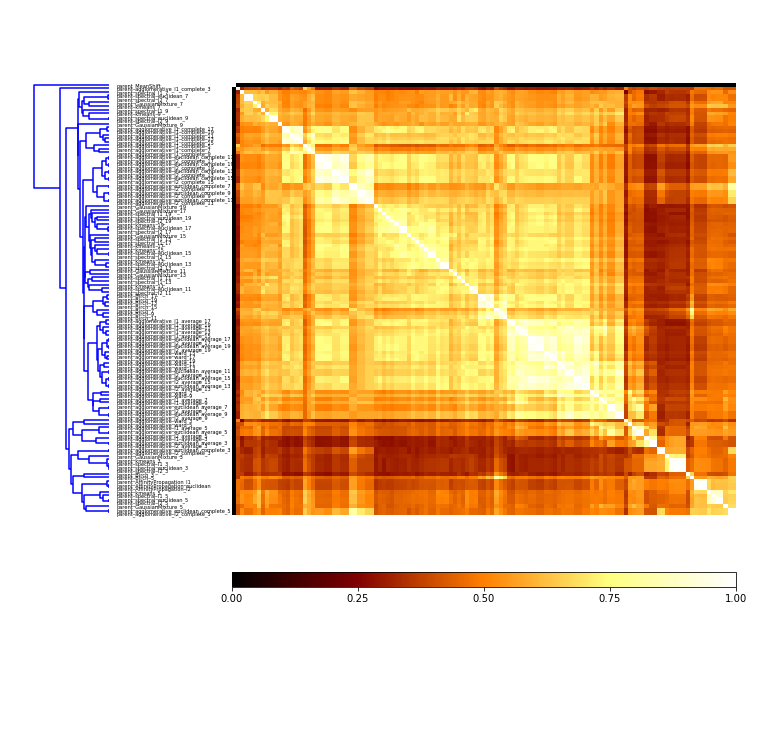

In [13]:
mi_adjusted.plot()

In [14]:
#plot MI with type of algorithm as label
label_vec = []
for index, row in mi_adjusted.matrix.iterrows():
    name = c.algorithms[index]
    label_vec.append(name)

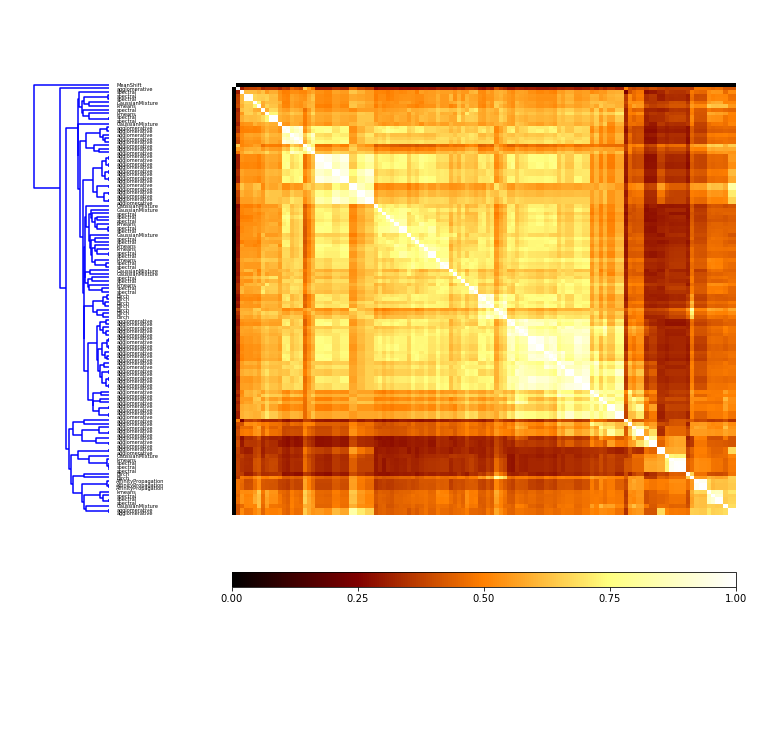

In [15]:
mi_adjusted.plot(threshold= 0, label_vec=label_vec)